In [26]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context("talk")
from datascience import *
plt.style.use("fivethirtyeight")


from IPython.display import display, Latex, Markdown

In [38]:
old_table = pd.read_csv("11_7_1_provision_and_access_to_open_spaces_in_cities_2020.csv")
old_table

,Indicator_series,Indicator_Description,City,Country,Region,Estimate_Year,Urban_Share_in_OPS,Urban_Share_in_Streets,Urban_Share_in_OPS_and_Streets,Population_with_OPS_access,Estimate_Source,ObjectId
0,SDG 11.7.1,Average share of the built-up area of cities t...,Charikar,Afghanistan,Central and Southern Asia,2020.0,1.38,16.60,17.98,44.58,UN-Habitat Urban Indicators Database,1
1,SDG 11.7.1,Average share of the built-up area of cities t...,Kandahar,Afghanistan,Central and Southern Asia,2020.0,1.06,11.22,12.28,11.22,UN-Habitat Urban Indicators Database,2
2,SDG 11.7.1,Average share of the built-up area of cities t...,Khanabad,Afghanistan,Central and Southern Asia,2020.0,2.60,11.04,13.63,59.61,UN-Habitat Urban Indicators Database,3
3,SDG 11.7.1,Average share of the built-up area of cities t...,Algiers,Algeria,Western Asia and Northern Africa,2020.0,2.49,12.39,14.89,41.23,UN-Habitat Urban Indicators Database,4
4,SDG 11.7.1,Average share of the built-up area of cities t...,Annaba,Algeria,Western Asia and Northern Africa,2020.0,3.09,11.71,14.80,49.59,UN-Habitat Urban Indicators Database,5
...,...,...,...,...,...,...,...,...,...,...,...,...
616,SDG 11.7.1,Average share of the built-up area of cities t...,Sullana,Peru,Latin America and the Caribbean,2017.0,0.79,35.89,36.68,NaN,National Institute of Statistics and Informati...,617
617,SDG 11.7.1,Average share of the built-up area of cities t...,Tacna,Peru,Latin America and the Caribbean,2017.0,1.61,30.56,32.17,NaN,National Institute of Statistics and Informati...,618
618,SDG 11.7.1,Average share of the built-up area of cities t...,Talara,Peru,Latin America and the Caribbean,2017.0,0.73,41.07,41.80,NaN,National Institute of Statistics and Informati...,619
619,SDG 11.7.1,Average share of the built-up area of cities t...,Tambo Grande,Peru,Latin America and the Caribbean,2017.0,0.66,28.30,28.97,NaN,National Institute of Statistics and Informati...,620


In [28]:
table = old_table[["Urban_Share_in_OPS","Urban_Share_in_Streets","Urban_Share_in_OPS_and_Streets","Population_with_OPS_access"]].dropna()
table

,Urban_Share_in_OPS,Urban_Share_in_Streets,Urban_Share_in_OPS_and_Streets,Population_with_OPS_access
0,1.38,16.60,17.98,44.58
1,1.06,11.22,12.28,11.22
2,2.60,11.04,13.63,59.61
3,2.49,12.39,14.89,41.23
4,3.09,11.71,14.80,49.59
...,...,...,...,...
567,4.28,14.91,19.20,48.85
568,1.20,10.42,11.62,36.93
569,2.72,19.45,22.17,37.57
570,1.84,15.81,17.65,41.27


In [29]:
from sklearn.model_selection import train_test_split
np.random.seed(47)
# Do not change the above code

X = table
Y = pd.Series(table['Population_with_OPS_access'])

X_train, X_test = train_test_split(X, test_size = 0.1, random_state = 83)
Y_train, Y_test = train_test_split(Y, test_size = 0.1, random_state = 83)

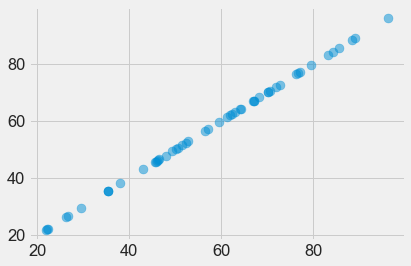

In [30]:

import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
#linear_model.fit(...)
linear_model.fit(X_train,Y_train)

# Predict housing prices on the test set
Y_pred = linear_model.predict(X_test)

# Plot predicted vs true prices
plt.scatter(Y_test, Y_pred, alpha=0.5)

In [31]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groundtruth
    """

    return np.sqrt(np.mean((actual_y - predicted_y)**2))

train_error = rmse(Y_train,linear_model.predict(X_train))
test_error = rmse(Y_test,linear_model.predict(X_test))

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)



Training RMSE: 1.2191093981534929e-14
Test RMSE: 1.315266346245892e-14


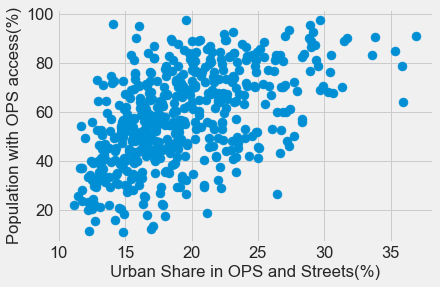

In [32]:
plt.scatter(pd.Series(table['Urban_Share_in_OPS_and_Streets']),pd.Series(table['Population_with_OPS_access']))
plt.xlabel("Urban Share in OPS and Streets(%)")
plt.ylabel("Population with OPS access(%)")
plt.show()

In [33]:
pd.Series(table['Urban_Share_in_OPS_and_Streets']).corr(pd.Series(table['Population_with_OPS_access']))

0.5234334931486825

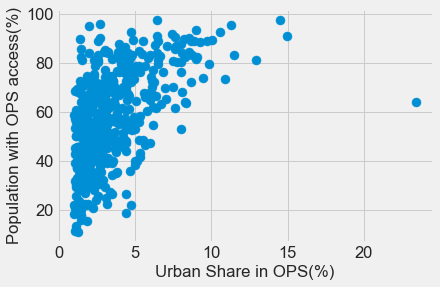

In [34]:
plt.scatter(pd.Series(table['Urban_Share_in_OPS']),pd.Series(table['Population_with_OPS_access']))
plt.xlabel("Urban Share in OPS(%)")
plt.ylabel("Population with OPS access(%)")
plt.show()

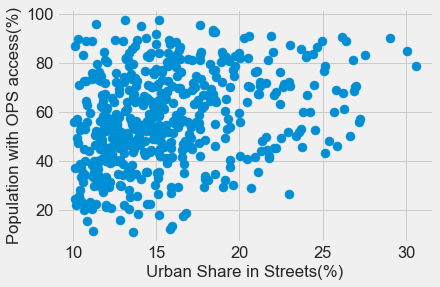

In [35]:
plt.scatter(pd.Series(table['Urban_Share_in_Streets']),pd.Series(table['Population_with_OPS_access']))
plt.xlabel("Urban Share in Streets(%)")
plt.ylabel("Population with OPS access(%)")
plt.show()

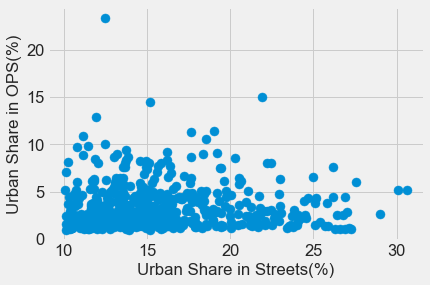

In [70]:
plt.scatter(pd.Series(table['Urban_Share_in_Streets']),pd.Series(table['Urban_Share_in_OPS']))
plt.xlabel("Urban Share in Streets(%)")
plt.ylabel("Urban Share in OPS(%)")
plt.show()

array([[<AxesSubplot:title={'center':'Population_with_OPS_access'}>]],
      dtype=object)

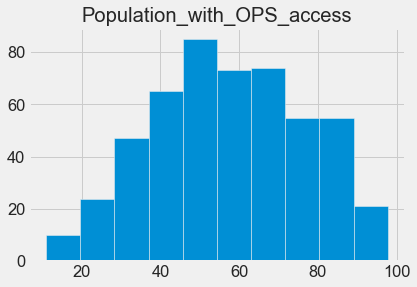

In [36]:
table.hist("Population_with_OPS_access")

array([[<AxesSubplot:title={'center':'Urban_Share_in_OPS_and_Streets'}>]],
      dtype=object)

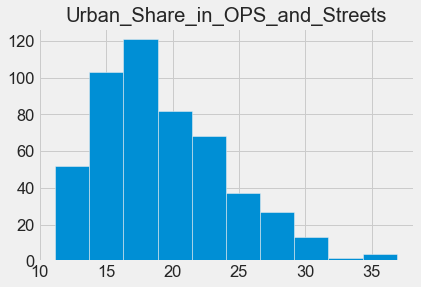

In [37]:
table.hist("Urban_Share_in_OPS_and_Streets")

In [61]:
country_table = old_table.groupby(["Country"]).mean()
top_10_access = country_table.sort_values(by=["Population_with_OPS_access"],ascending=False).head(10)
top_10_access

,Estimate_Year,Urban_Share_in_OPS,Urban_Share_in_Streets,Urban_Share_in_OPS_and_Streets,Population_with_OPS_access,ObjectId
Country,,,,,,
Maldives,2020.000000,6.440000,13.150000,19.590000,97.730000,110.000000
Netherlands,2020.000000,7.430000,15.010000,22.430000,91.930000,149.000000
Canada,2020.000000,8.745556,13.868889,22.615556,85.158889,64.777778
New Zealand,2020.000000,7.664444,16.648889,24.313333,84.105556,300.000000
Egypt,2020.000000,2.010000,16.510000,18.515000,83.675000,254.500000
Tajikistan,2020.000000,4.780000,10.620000,15.400000,83.350000,532.000000
Switzerland,2020.000000,5.233000,17.488000,22.720000,79.191000,505.300000
Australia,2020.000000,7.881250,12.213750,20.092500,78.656250,43.500000
Germany,2020.000000,7.906667,23.603333,31.510000,78.393333,284.000000


In [63]:
top_10_share = country_table.sort_values(by=["Urban_Share_in_OPS_and_Streets"],ascending=False).head(10)
top_10_share

,Estimate_Year,Urban_Share_in_OPS,Urban_Share_in_Streets,Urban_Share_in_OPS_and_Streets,Population_with_OPS_access,ObjectId
Country,,,,,,
Peru,2017.0,1.023152,31.547500,32.570652,NaN,502.217391
Germany,2020.0,7.906667,23.603333,31.510000,78.393333,284.000000
Colombia,2020.0,2.596296,25.306667,27.904815,65.087037,157.111111
Singapore,2020.0,7.460000,19.420000,26.870000,70.260000,453.000000
Yemen,2020.0,2.695000,22.965000,25.655000,39.000000,506.500000
Tunisia,2020.0,4.020000,21.030000,25.048571,61.798571,540.000000
New Zealand,2020.0,7.664444,16.648889,24.313333,84.105556,300.000000
Kuwait,2020.0,1.530000,22.520000,24.050000,49.420000,396.000000
Spain,2020.0,6.700000,17.250000,23.940000,63.130000,455.000000


In [64]:
bottom_10_access = country_table.sort_values(by=["Population_with_OPS_access"]).head(10)
bottom_10_access

,Estimate_Year,Urban_Share_in_OPS,Urban_Share_in_Streets,Urban_Share_in_OPS_and_Streets,Population_with_OPS_access,ObjectId
Country,,,,,,
South Africa,2020.0,1.8500,10.840000,12.700000,15.400000,454.0
Rwanda,2020.0,1.0450,12.990000,14.035000,16.990000,433.5
Congo Dem. Rep.,2020.0,1.4200,16.610000,18.030000,17.310000,224.0
Uzbekistan,2020.0,1.8800,14.056667,15.936667,18.033333,488.0
Oman,2020.0,1.0100,13.920000,14.930000,18.190000,339.0
Iraq,2020.0,1.3200,13.370000,14.690000,20.330000,322.0
Haiti,2020.0,1.0700,12.000000,13.070000,20.840000,289.0
Malaysia,2020.0,1.7100,10.640000,12.350000,22.360000,109.0
Thailand,2020.0,1.6875,13.007500,14.692500,27.887500,534.5


In [66]:
bottom_10_share = country_table.sort_values(by=["Urban_Share_in_OPS_and_Streets"]).head(10)
bottom_10_share

,Estimate_Year,Urban_Share_in_OPS,Urban_Share_in_Streets,Urban_Share_in_OPS_and_Streets,Population_with_OPS_access,ObjectId
Country,,,,,,
Myanmar,2020.0,1.180000,10.500,11.680000,37.170000,148.000000
Malaysia,2020.0,1.710000,10.640,12.350000,22.360000,109.000000
Bangladesh,2020.0,1.192500,11.485,12.677500,34.215000,152.500000
Guatemala,2020.0,1.725000,10.965,12.685000,40.655000,287.500000
South Africa,2020.0,1.850000,10.840,12.700000,15.400000,454.000000
Honduras,2020.0,2.016667,10.880,12.896667,47.843333,291.333333
Haiti,2020.0,1.070000,12.000,13.070000,20.840000,289.000000
Panama,2020.0,2.680000,10.400,13.090000,38.650000,347.000000
Lebanon,2020.0,1.190000,12.165,13.355000,58.975000,105.500000


In [67]:
#For further analysis, we can group by cities, region and year to invesigate. We can also break down the dataset into
#two groups to see if it decreases the rmse of our linear regression model. 